# Session 5: Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

In [ ]:
# Do not execute all the cells
# Please follow the class
STOP

## Datasets

We'll be working the following datasets in this session.

The Gapminder dataset.

In [2]:
df_gap = pd.read_csv("data/gapminder.csv")

In [3]:
df_gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


The UN data with statistics about countries.

In [4]:
df_un = pd.read_csv("data/un-min.csv")

In [5]:
df_un.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


The indian railways data about trains and stations.

In [6]:
df_trains = pd.read_csv("data/trains.csv")
df_stations = pd.read_csv("data/stations.csv")

In [7]:
df_trains.head()

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
0,04601,Jammu Tawi Udhampur Special,DEMU,NR,JAT,JAMMU TAWI,UHP,UDHAMPUR,10:40:00,12:15:00,1.0,35.0,53.0,04602,0,0,0,0,0,0
1,04602,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,06:45:00,08:35:00,1.0,50.0,53.0,04601,0,0,0,0,0,0
2,04603,JAT UDAHMPUR DMU,DEMU,NR,JAT,JAMMU TAWI,UHP,UDHAMPUR,16:15:00,17:50:00,1.0,35.0,53.0,04604,0,0,0,0,0,0
3,04604,UDHAMPUR JAMMUTAWI DMU,DEMU,NR,UHP,UDHAMPUR,JAT,JAMMU TAWI,18:20:00,19:50:00,1.0,30.0,53.0,04603,0,0,0,0,0,0
4,04728,Mumbai BandraT-Bikaner SF Special,SF,NWR,BDTS,MUMBAI BANDRA TERMINUS,BKN,BIKANER JN,14:35:00,12:30:00,21.0,55.0,1212.0,04727,1,1,1,0,0,0


In [8]:
df_stations.head()

,code,name,zone,state,address,latitude,longitude
0,BDHL,Badhal,NWR,Rajasthan,"Kishangarh Renwal, Rajasthan",75.451645,27.252059
1,KHH,KICHHA,NER,Uttar Pradesh,"Kichha, Uttar Pradesh",79.519746,28.913427
2,SRKN,Sherekan,NWR,Rajasthan,"MDR 89, Rajasthan",74.434991,29.555198
3,BKKA,Bhukarka,NWR,Rajasthan,"Bhukarka, Rajasthan",74.751031,29.238227
4,NHR,Nohar,NWR,Rajasthan,"State Highway 36, Rajasthan",74.773628,29.192563


And finally, currency conversion dataset from europian central bank with conversion rates against EURO.

In [9]:
df_currency = pd.read_csv("data/currency-rate.csv")

In [10]:
df_currency.head()

,date,currency,rate
0,2023-11-29,USD,1.0985
1,2023-11-28,USD,1.0949
2,2023-11-27,USD,1.0951
3,2023-11-24,USD,1.0916
4,2023-11-23,USD,1.0900


## Combining Datasets

A lot of times we find data split across multiple files. We need to combine multiple dataset to get the desired data. 

There are multiple ways to combine datasets. The most common one is to concatinate multple dataframes.

![Concatenate Datasets](images/data-concat.png)

The other way to join data frames on a key column.

![Join Datasets](images/data-merge1.png)

Sometimes we may have to merge multiple datasets to get all the data columns.

![Merge Datasets](images/data-merge2.png)


### Example: Gapminder data split by year

Consider the following files where each files contains the gapminder data split by each year.

In [11]:
!tree data/gapminder/year

data/gapminder/year
├── 1952.csv
├── 1957.csv
├── 1962.csv
├── 1967.csv
├── 1972.csv
├── 1977.csv
├── 1982.csv
├── 1987.csv
├── 1992.csv
├── 1997.csv
├── 2002.csv
└── 2007.csv

1 directory, 12 files


In [16]:
!ls data/gapminder/year

1952.csv  1962.csv  1972.csv  1982.csv	1992.csv  2002.csv
1957.csv  1967.csv  1977.csv  1987.csv	1997.csv  2007.csv


In [17]:
!tree data/gapminder

data/gapminder
├── continent
│   ├── Africa.csv
│   ├── Americas.csv
│   ├── Asia.csv
│   ├── Europe.csv
│   └── Oceania.csv
├── master
│   ├── master.csv
│   └── metrics.csv
├── metrics
│   ├── gdpPercap.csv
│   ├── lifeExp.csv
│   └── pop.csv
└── year
    ├── 1952.csv
    ├── 1957.csv
    ├── 1962.csv
    ├── 1967.csv
    ├── 1972.csv
    ├── 1977.csv
    ├── 1982.csv
    ├── 1987.csv
    ├── 1992.csv
    ├── 1997.csv
    ├── 2002.csv
    └── 2007.csv

5 directories, 22 files


Let's read one of them.

In [12]:
df1 = pd.read_csv("data/gapminder/year/1952.csv")

In [13]:
df1.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,28.801,8425333,779.445314,AFG,4
1,Albania,Europe,55.230,1282697,1601.056136,ALB,8
2,Algeria,Africa,43.077,9279525,2449.008185,DZA,12
3,Angola,Africa,30.015,4232095,3520.610273,AGO,24
4,Argentina,Americas,62.485,17876956,5911.315053,ARG,32


Notice that the dataframe does not have an year column. We need to take the year from the filename in this case.

Let's read another one.

In [14]:
df2 = pd.read_csv("data/gapminder/year/1957.csv")

In [15]:
df2.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,30.332,9240934,820.853030,AFG,4
1,Albania,Europe,59.280,1476505,1942.284244,ALB,8
2,Algeria,Africa,45.685,10270856,3013.976023,DZA,12
3,Angola,Africa,31.999,4561361,3827.940465,AGO,24
4,Argentina,Americas,64.399,19610538,6856.856212,ARG,32


Let's see how to combine these two datasets.

First let's add the year column to both of them.

In [18]:
df1['year'] = 1952
df2['year'] = 1957

In [19]:
df1.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
0,Afghanistan,Asia,28.801,8425333,779.445314,AFG,4,1952
1,Albania,Europe,55.230,1282697,1601.056136,ALB,8,1952
2,Algeria,Africa,43.077,9279525,2449.008185,DZA,12,1952
3,Angola,Africa,30.015,4232095,3520.610273,AGO,24,1952
4,Argentina,Americas,62.485,17876956,5911.315053,ARG,32,1952


In [20]:
df2.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
0,Afghanistan,Asia,30.332,9240934,820.853030,AFG,4,1957
1,Albania,Europe,59.280,1476505,1942.284244,ALB,8,1957
2,Algeria,Africa,45.685,10270856,3013.976023,DZA,12,1957
3,Angola,Africa,31.999,4561361,3827.940465,AGO,24,1957
4,Argentina,Americas,64.399,19610538,6856.856212,ARG,32,1957


In [21]:
df1.shape

(142, 8)

In [22]:
df2.shape

(142, 8)

We just need to combine these two by placing one below the other. We could do that using `pd.concat` function.

In [23]:
df = pd.concat([df1, df2])

In [24]:
df.shape

(284, 8)

In [25]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
0,Afghanistan,Asia,28.801,8425333,779.445314,AFG,4,1952
1,Albania,Europe,55.230,1282697,1601.056136,ALB,8,1952
2,Algeria,Africa,43.077,9279525,2449.008185,DZA,12,1952
3,Angola,Africa,30.015,4232095,3520.610273,AGO,24,1952
4,Argentina,Americas,62.485,17876956,5911.315053,ARG,32,1952


Let's look at the data for one country.

In [26]:
df[df.country == 'India']

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
58,India,Asia,37.373,372000000,546.565749,IND,356,1952
58,India,Asia,40.249,409000000,590.061996,IND,356,1957


In [28]:
df1[df1.country == 'India']

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
58,India,Asia,37.373,372000000,546.565749,IND,356,1952


In [29]:
df2[df2.country == 'India']

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
58,India,Asia,40.249,409000000,590.061996,IND,356,1957


Please note that both the rows have same index. That was because the `contact` function retained the index that it got from individual dataframes.

We could drop the index to get a fresh one.

In [30]:
df.reset_index(drop=True, inplace=True)
df[df.country == 'India']

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
58,India,Asia,37.373,372000000,546.565749,IND,356,1952
200,India,Asia,40.249,409000000,590.061996,IND,356,1957


Or we could tell concat to ignore the index.

In [31]:
df = pd.concat([df1, df2], ignore_index=True)

In [32]:
df[df.country == 'India']

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
58,India,Asia,37.373,372000000,546.565749,IND,356,1952
200,India,Asia,40.249,409000000,590.061996,IND,356,1957


We have combined only two files here, but there are multiple files. It may be handy to write a function to read the dataframe and add the year column.

In [34]:
def read_data(path, column):
    """Reads the data in the given path and adds a column with value as the stem of the path.

    For example, read_data("1957.csv", "year") will have an additional column year with 1957 as value.
    """
    df = pd.read_csv(path)
    df[column] = Path(path).stem
    return df

In [35]:
read_data("data/gapminder/year/1952.csv", "year").head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
0,Afghanistan,Asia,28.801,8425333,779.445314,AFG,4,1952
1,Albania,Europe,55.230,1282697,1601.056136,ALB,8,1952
2,Algeria,Africa,43.077,9279525,2449.008185,DZA,12,1952
3,Angola,Africa,30.015,4232095,3520.610273,AGO,24,1952
4,Argentina,Americas,62.485,17876956,5911.315053,ARG,32,1952


Let's read all the dataframes now.

In [36]:
dfs = [read_data(p, "year") for p in Path("data/gapminder/year").glob("*.csv")]

In [45]:
df = pd.concat(dfs, ignore_index=True)

In [46]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num,year
0,Afghanistan,Asia,39.854,12881816,978.011439,AFG,4,1982
1,Albania,Europe,70.420,2780097,3630.880722,ALB,8,1982
2,Algeria,Africa,61.368,20033753,5745.160213,DZA,12,1982
3,Angola,Africa,39.942,7016384,2756.953672,AGO,24,1982
4,Argentina,Americas,69.942,29341374,8997.897412,ARG,32,1982


In [47]:
df.shape

(1704, 8)

In [48]:
1704/142

12.0

<Axes: xlabel='year', ylabel='gdpPercap'>

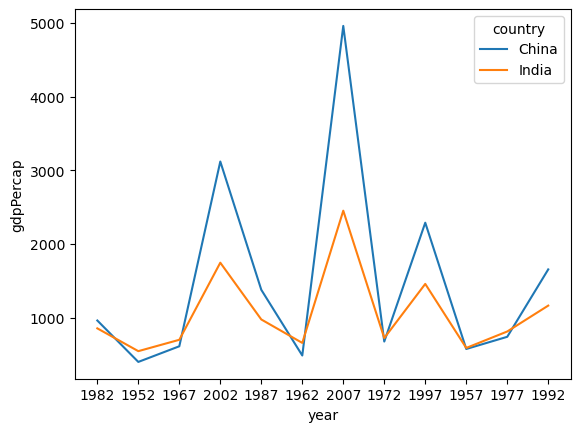

In [49]:
sns.lineplot(df[df.country.isin(["India", "China"])], x="year", y="gdpPercap", hue="country")

Why are we getting data like this? Why is this not sorted by year? 

Let's look at the datatypes of columns.

In [50]:
df.dtypes

country       object
continent     object
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
year          object
dtype: object

In [51]:
df.year[0]

'1982'

Notice that the year is not an integer column. It is a string column. Let's convert that to an integer.

In [52]:
df['year'] = df['year'].astype('int')

In [53]:
df.dtypes

country       object
continent     object
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
year           int64
dtype: object

<Axes: xlabel='year', ylabel='gdpPercap'>

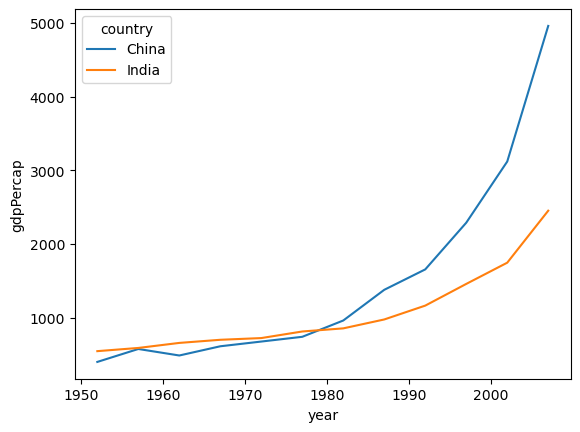

In [54]:
sns.lineplot(df[df.country.isin(["India", "China"])], x="year", y="gdpPercap", hue="country")

### Problem: Currency Convertion Data from Europian Central Bank

The [Europian Central Bank][1] maintains the [historic data for Euro foreign exchange reference rates][2].

[1]: https://www.ecb.europa.eu/
[2]: https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html

The data is available in the `data/euro/date` directory, organized by date. It has data since 1999, a total of 6382 dates.

Let's see all the files for Nov 2023.

In [56]:
!tree data/euro/date -P '2023-11-*'

data/euro/date
├── 2023-11-01.csv
├── 2023-11-02.csv
├── 2023-11-03.csv
├── 2023-11-06.csv
├── 2023-11-07.csv
├── 2023-11-08.csv
├── 2023-11-09.csv
├── 2023-11-10.csv
├── 2023-11-13.csv
├── 2023-11-14.csv
├── 2023-11-15.csv
├── 2023-11-16.csv
├── 2023-11-17.csv
├── 2023-11-20.csv
├── 2023-11-21.csv
├── 2023-11-22.csv
├── 2023-11-23.csv
├── 2023-11-24.csv
├── 2023-11-27.csv
├── 2023-11-28.csv
└── 2023-11-29.csv

1 directory, 21 files


In [58]:
!cal

   November 2023      
Su Mo Tu We Th Fr Sa  
          1  2  3  4  
 5  6  7  8  9 10 11  
12 13 14 15 16 17 18  
19 20 21 22 23 24 25  
26 27 28 29 30        
                      


In [60]:
!head data/euro/date/2023-11-01.csv

currency,rate
USD,1.0537
JPY,159.33
BGN,1.9558
CZK,24.677
DKK,7.4644
GBP,0.86945
HUF,383.75
PLN,4.4658
RON,4.9679


Each file contains the convertion rate against EUR for all the tracked currencies on that day.

Write a program to read all these files, combine them into a single dataset. 

Plot a line graph comparing the of convertion rates of `INR` and `JPY` against `EUR`. You may want to convert the date column into datetme before ploting the graph, using the following code.

```
df['date'] = pd.to_datetime(df['date'])
```

In [61]:
df_currency.shape

(199595, 3)

In [62]:
df_currency.head()

,date,currency,rate
0,2023-11-29,USD,1.0985
1,2023-11-28,USD,1.0949
2,2023-11-27,USD,1.0951
3,2023-11-24,USD,1.0916
4,2023-11-23,USD,1.0900


In [63]:
!ls data/*.csv

data/currency-rate.csv	data/stations.csv  data/un-min.csv
data/gapminder.csv	data/trains.csv


![](images/INR-JPY.svg)

## Joining  Datasets

Sometimes we need to join multiple datasets to get the required data.

Lets look at another dataset where the gapminder data is split into master data and metrics.

In [64]:
!tree data/gapminder/master

data/gapminder/master
├── master.csv
└── metrics.csv

1 directory, 2 files


In [65]:
df_master = pd.read_csv("data/gapminder/master/master.csv")

In [66]:
df_master.head()

,country,continent,iso_alpha,iso_num
0,Afghanistan,Asia,AFG,4
1,Albania,Europe,ALB,8
2,Algeria,Africa,DZA,12
3,Angola,Africa,AGO,24
4,Argentina,Americas,ARG,32


In [67]:
df_master.shape

(142, 4)

In [68]:
df_metrics = pd.read_csv("data/gapminder/master/metrics.csv")

In [69]:
df_metrics.head()

,country,year,lifeExp,pop,gdpPercap
0,Afghanistan,1952,28.801,8425333,779.445314
1,Afghanistan,1957,30.332,9240934,820.853030
2,Afghanistan,1962,31.997,10267083,853.100710
3,Afghanistan,1967,34.020,11537966,836.197138
4,Afghanistan,1972,36.088,13079460,739.981106


In [70]:
df_metrics.dtypes

country       object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [71]:
df_metrics.shape

(1704, 5)

As you can see the master dataset has one entry for every country and the metrics dataset has one entry for every country and year combination.

There are multiple ways to merge them.

### Approach 1: Merge metrics with master

In [72]:
df = df_metrics.merge(df_master, left_on="country", right_on="country")

In [73]:
df.head()

,country,year,lifeExp,pop,gdpPercap,continent,iso_alpha,iso_num
0,Afghanistan,1952,28.801,8425333,779.445314,Asia,AFG,4
1,Afghanistan,1957,30.332,9240934,820.853030,Asia,AFG,4
2,Afghanistan,1962,31.997,10267083,853.100710,Asia,AFG,4
3,Afghanistan,1967,34.020,11537966,836.197138,Asia,AFG,4
4,Afghanistan,1972,36.088,13079460,739.981106,Asia,AFG,4


In [74]:
df.continent.value_counts()

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='gdpPercap'>

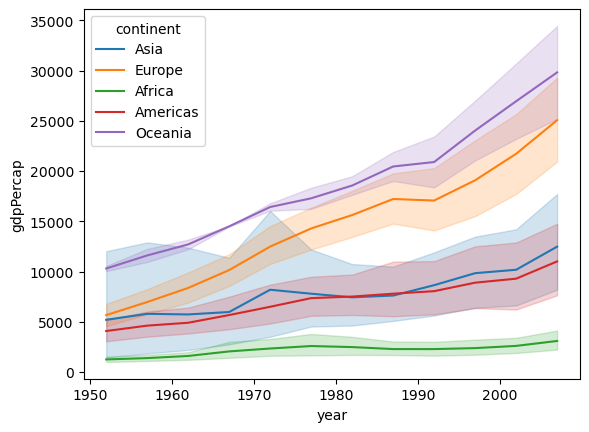

In [75]:
sns.lineplot(df, x='year', y='gdpPercap', hue='continent')

### Approach 2: Merge master with metrics

In [76]:
df = df_master.merge(df_metrics, left_on="country", right_on="country")

In [77]:
df.head()

,country,continent,iso_alpha,iso_num,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,AFG,4,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,AFG,4,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,AFG,4,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,AFG,4,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,AFG,4,1972,36.088,13079460,739.981106


### Approach 3: Join

Join works on the index of the main dataframe.

In [78]:
df_master1 = df_master.set_index("country")
df_metrics1 = df_metrics.set_index("country")

In [79]:
df_master1.head()

,continent,iso_alpha,iso_num
country,,,
Afghanistan,Asia,AFG,4
Albania,Europe,ALB,8
Algeria,Africa,DZA,12
Angola,Africa,AGO,24
Argentina,Americas,ARG,32


In [80]:
df_metrics1.head()

,year,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,1952,28.801,8425333,779.445314
Afghanistan,1957,30.332,9240934,820.853030
Afghanistan,1962,31.997,10267083,853.100710
Afghanistan,1967,34.020,11537966,836.197138
Afghanistan,1972,36.088,13079460,739.981106


In [81]:
df = df_metrics1.join(df_master1)

In [82]:
df.head()

,year,lifeExp,pop,gdpPercap,continent,iso_alpha,iso_num
country,,,,,,,
Afghanistan,1952,28.801,8425333,779.445314,Asia,AFG,4
Afghanistan,1957,30.332,9240934,820.853030,Asia,AFG,4
Afghanistan,1962,31.997,10267083,853.100710,Asia,AFG,4
Afghanistan,1967,34.020,11537966,836.197138,Asia,AFG,4
Afghanistan,1972,36.088,13079460,739.981106,Asia,AFG,4


In [85]:
df_un

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055
...,...,...,...,...,...,...
183,Viet.Nam,Asia,64.9,69.6,37,270
184,Yemen,Asia,57.4,58.4,80,732
185,Yugoslavia,Europe,69.8,75.3,19,1487
186,Zambia,Africa,42.2,43.7,103,382


In [87]:
# df_un = df_un.set_index("country")
df_un.set_index("country", inplace=True)

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055
...,...,...,...,...,...
Viet.Nam,Asia,64.9,69.6,37,270
Yemen,Asia,57.4,58.4,80,732
Yugoslavia,Europe,69.8,75.3,19,1487


In [88]:
df_un.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


### Problem: Merge Gapminder Datasets

The `data/gapminder/metrics` directory has multiple datasets with one metric in each file.

In [83]:
!tree data/gapminder/metrics

data/gapminder/metrics
├── gdpPercap.csv
├── lifeExp.csv
└── pop.csv

1 directory, 3 files


In [84]:
!head data/gapminder/metrics/pop.csv

continent,country,year,pop
Asia,Afghanistan,1952,8425333
Asia,Afghanistan,1957,9240934
Asia,Afghanistan,1962,10267083
Asia,Afghanistan,1967,11537966
Asia,Afghanistan,1972,13079460
Asia,Afghanistan,1977,14880372
Asia,Afghanistan,1982,12881816
Asia,Afghanistan,1987,13867957
Asia,Afghanistan,1992,16317921


Write a program to combine data in all these files into a single dataframe.

In [89]:
!head data/gapminder/metrics/gdpPercap.csv

continent,country,year,gdpPercap
Asia,Afghanistan,1952,779.4453145
Asia,Afghanistan,1957,820.8530296
Asia,Afghanistan,1962,853.1007099999998
Asia,Afghanistan,1967,836.1971382
Asia,Afghanistan,1972,739.9811057999998
Asia,Afghanistan,1977,786.11336
Asia,Afghanistan,1982,978.0114388
Asia,Afghanistan,1987,852.3959447999998
Asia,Afghanistan,1992,649.3413952000002


In [97]:
df1 = pd.read_csv("data/gapminder/metrics/pop.csv")
df2 = pd.read_csv("data/gapminder/metrics/gdpPercap.csv")


In [98]:
df1.head()

,continent,country,year,pop
0,Asia,Afghanistan,1952,8425333
1,Asia,Afghanistan,1957,9240934
2,Asia,Afghanistan,1962,10267083
3,Asia,Afghanistan,1967,11537966
4,Asia,Afghanistan,1972,13079460


In [100]:
df1.shape

(1704, 4)

In [99]:
# df1.set_index("country", inplace=True)

In [101]:
df = df1.merge(df2, left_on="country", right_on="country")

In [102]:
df.shape

(20448, 7)

In [103]:
%%file prices.csv
item,price
apple,100
banana,50
mango,75

Writing prices.csv


In [104]:
%%file transactions.csv
date,item,quantity
2023-11-01,apple,1
2023-11-01,banana,10
2023-11-02,apple,20
2023-11-02,mango,30


Writing transactions.csv


In [106]:
df1a = df1.head(5)
df2a = df2.head(5)

In [107]:
df1a

,continent,country,year,pop
0,Asia,Afghanistan,1952,8425333
1,Asia,Afghanistan,1957,9240934
2,Asia,Afghanistan,1962,10267083
3,Asia,Afghanistan,1967,11537966
4,Asia,Afghanistan,1972,13079460


In [108]:
df2a

,continent,country,year,gdpPercap
0,Asia,Afghanistan,1952,779.445314
1,Asia,Afghanistan,1957,820.853030
2,Asia,Afghanistan,1962,853.100710
3,Asia,Afghanistan,1967,836.197138
4,Asia,Afghanistan,1972,739.981106


In [111]:
df1a.merge(df2a, left_on=["country", "continent", "year"], right_on=["country", "continent", "year"])

,continent,country,year,pop,gdpPercap
0,Asia,Afghanistan,1952,8425333,779.445314
1,Asia,Afghanistan,1957,9240934,820.853030
2,Asia,Afghanistan,1962,10267083,853.100710
3,Asia,Afghanistan,1967,11537966,836.197138
4,Asia,Afghanistan,1972,13079460,739.981106


### Problem: Number of Trains from Each State

In [114]:
frm = "SBC"
df_trains.query("from_station_code==@frm")

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
116,08470,Bangalore-Puri Garib Rath Special,GR,ECoR,SBC,BANGALORE CITY JN,PURI,PURI,23:55:00,05:50:00,29.0,55.0,1529.0,08469,0,1,0,0,0,0
303,12028,BANGALORE CITY - CHENNAI CENT Shatabdi Exp,Shtb,SWR,SBC,BANGALORE CITY JN,MAS,CHENNAI CENTRAL,06:00:00,11:00:00,5.0,0.0,362.0,12027,0,0,0,0,0,1
340,12079,Bangalore City-Hubli Jan Shatabdi,JShtb,SWR,SBC,BANGALORE CITY JN,UBL,HUBLI JN,06:00:00,13:25:00,7.0,25.0,469.0,12080,0,0,0,0,0,1
526,12295,BANGALORE - PATLIPUTRA Sanghamitra SF Exp,SF,SWR,SBC,BANGALORE CITY JN,PPTA,PATLIPUTRA,09:00:00,09:20:00,48.0,20.0,2729.0,12296,1,1,1,0,0,0
624,12429,Bangalore - Hazrat Nizamuddin Rajdhani Express,Raj,NR,SBC,BANGALORE CITY JN,NZM,DELHI H NIZAMUDDIN,20:20:00,05:50:00,33.0,30.0,2365.0,12430,0,1,1,1,0,0
679,12493,Bangalore-Hazrat Nizammudin Rajdhani Express,Raj,NR,SBC,BANGALORE CITY JN,NZM,DELHI H NIZAMUDDIN,20:20:00,05:50:00,33.0,30.0,2294.0,12494,0,1,1,1,0,0
750,12608,BANGALORE - CHENNAI CENTRAL Lalbagh Exp,SF,SWR,SBC,BANGALORE CITY JN,MAS,CHENNAI CENTRAL,06:30:00,12:15:00,5.0,45.0,362.0,12607,0,0,0,0,0,1
774,12614,Tippu Express,SF,SWR,SBC,BANGALORE CITY JN,MYS,MYSORE JN,15:00:00,17:30:00,2.0,30.0,139.0,12613,0,0,0,0,0,1
787,12640,BANGALORE - CHENNAI CENT Brindavan Exp,SF,SR,SBC,BANGALORE CITY JN,MAS,CHENNAI CENTRAL,14:30:00,20:25:00,5.0,55.0,362.0,12639,0,0,0,0,0,1
795,12658,BANGALORE - CHENNAI Mail,SF,SWR,SBC,BANGALORE CITY JN,MAS,CHENNAI CENTRAL,22:45:00,04:40:00,5.0,55.0,362.0,12657,1,1,1,1,0,0


In [116]:
df_trains[df_trains.number == '12429']

,number,name,type,zone,from_station_code,from_station_name,to_station_code,to_station_name,departure,arrival,duration_h,duration_m,distance,return_train,sleeper,third_ac,second_ac,first_ac,first_class,chair_car
624,12429,Bangalore - Hazrat Nizamuddin Rajdhani Express,Raj,NR,SBC,BANGALORE CITY JN,NZM,DELHI H NIZAMUDDIN,20:20:00,05:50:00,33.0,30.0,2365.0,12430,0,1,1,1,0,0


In [117]:
df_stations[df_stations.code == 'SBC']

,code,name,zone,state,address,latitude,longitude
1065,SBC,BANGALORE CITY JN,SWR,Karnataka,"Bengaluru, Karnataka",77.568083,12.977595


Use the trains and stations datasets to find the number of trains starting from each state.

In [126]:
df = df_trains.merge(df_stations, left_on='from_station_code', right_on='code')

In [127]:
df_trains.shape

(5208, 20)

In [128]:
df.shape

(5193, 27)

In [129]:
df.state.value_counts()

state
Maharashtra          228
Karnataka            201
Gujarat              179
Madhya Pradesh       163
Uttar Pradesh        151
Rajasthan            125
Tamil Nadu           116
Bihar                110
Andhra Pradesh       110
Haryana               95
West Bengal           93
Delhi NCT             92
Uttarakhand           78
Punjab                55
Assam                 50
Jammu and Kashmir     43
Chhattisgarh          34
Jharkhand             33
Kerala                32
Goa                   22
Himachal Pradesh      16
Chandigarh            10
Orissa                 9
Puducherry             9
Tripura                7
Odisha                 3
Bangladesh             2
Nagaland               2
Mizoram                1
Name: count, dtype: int64

In [136]:

df_stations1 = df_stations[['code', 'state']]
columns = ["number", "name", "from_station_code", "to_station_code", "from_station_name", "to_station_name"]

df = (
    df_trains[columns]
    .merge(df_stations1, left_on='from_station_code', right_on='code')
    .rename(columns={"state": "from_state"})
    .drop(columns=["code"])
    .merge(df_stations1, left_on='to_station_code', right_on='code')
    .rename(columns={"state": "to_state"})
    .drop(columns=["code"])
)
    

In [137]:
df.head()

,number,name,from_station_code,to_station_code,from_station_name,to_station_name,from_state,to_state
0,04601,Jammu Tawi Udhampur Special,JAT,UHP,JAMMU TAWI,UDHAMPUR,Jammu and Kashmir,Jammu and Kashmir
1,04603,JAT UDAHMPUR DMU,JAT,UHP,JAMMU TAWI,UDHAMPUR,Jammu and Kashmir,Jammu and Kashmir
2,54653,Jammu Udhampur Passenger,JAT,UHP,JAMMU TAWI,UDHAMPUR,Jammu and Kashmir,Jammu and Kashmir
3,19107,Ahmedabad-Udhampur Janmabhoomi Express,ADI,UHP,AHMEDABAD JN,UDHAMPUR,NaN,Jammu and Kashmir
4,14033,Jammu Mail,DLI,UHP,OLD DELHI,UDHAMPUR,Delhi NCT,Jammu and Kashmir


How many trains are going with in a state?

In [139]:
df[df.from_state == df.to_state].from_state.value_counts()

from_state
Karnataka            102
Gujarat               88
Madhya Pradesh        67
Rajasthan             51
Uttar Pradesh         46
Maharashtra           37
Tamil Nadu            35
Bihar                 29
Haryana               27
West Bengal           24
Assam                 21
Andhra Pradesh        17
Uttarakhand           16
Chhattisgarh          12
Punjab                 9
Goa                    6
Jammu and Kashmir      6
Tripura                4
Kerala                 4
Name: count, dtype: int64

Which states have more connecting trains?

In [144]:
df[df.from_state != df.to_state].groupby(["from_state", "to_state"]).count()["number"].sort_values()

from_state      to_state         
Andhra Pradesh  Bihar                 1
Maharashtra     Delhi NCT             1
Madhya Pradesh  Uttarakhand           1
                Jammu and Kashmir     1
Karnataka       Rajasthan             1
                                     ..
                Maharashtra          12
Maharashtra     Andhra Pradesh       14
Andhra Pradesh  Maharashtra          14
Delhi NCT       Haryana              17
Haryana         Delhi NCT            17
Name: number, Length: 139, dtype: int64

## Pivot and Melt

Pivot operation converts the data in long-format to wide-format.


![Pivot Operation](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)

Source: [Pandas Docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping)

In [145]:
df_un.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


In [146]:
df_gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


The gapminder dataset has one row for every year. What if we want to see years as columns and show popuation data?

In [148]:
# df_gap.pivot(columns="year", index=["continent", "country"], values="pop")
df_gap.pivot(columns="year", index="country", values="pop")

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,8425333,9240934,10267083,11537966,13079460,14880372,12881816,13867957,16317921,22227415,25268405,31889923
Albania,1282697,1476505,1728137,1984060,2263554,2509048,2780097,3075321,3326498,3428038,3508512,3600523
Algeria,9279525,10270856,11000948,12760499,14760787,17152804,20033753,23254956,26298373,29072015,31287142,33333216
Angola,4232095,4561361,4826015,5247469,5894858,6162675,7016384,7874230,8735988,9875024,10866106,12420476
Argentina,17876956,19610538,21283783,22934225,24779799,26983828,29341374,31620918,33958947,36203463,38331121,40301927
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,26246839,28998543,33796140,39463910,44655014,50533506,56142181,62826491,69940728,76048996,80908147,85262356
West Bank and Gaza,1030585,1070439,1133134,1142636,1089572,1261091,1425876,1691210,2104779,2826046,3389578,4018332
"Yemen, Rep.",4963829,5498090,6120081,6740785,7407075,8403990,9657618,11219340,13367997,15826497,18701257,22211743


We can use `reset_index` want the continent and country columns to be part of data and not in the index.

In [149]:
(df_gap
 .pivot(columns="year", index=["continent", "country"], values="pop")
 .reset_index()
 .rename_axis("", axis="columns")
 .head())

,continent,country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
0,Africa,Algeria,9279525,10270856,11000948,12760499,14760787,17152804,20033753,23254956,26298373,29072015,31287142,33333216
1,Africa,Angola,4232095,4561361,4826015,5247469,5894858,6162675,7016384,7874230,8735988,9875024,10866106,12420476
2,Africa,Benin,1738315,1925173,2151895,2427334,2761407,3168267,3641603,4243788,4981671,6066080,7026113,8078314
3,Africa,Botswana,442308,474639,512764,553541,619351,781472,970347,1151184,1342614,1536536,1630347,1639131
4,Africa,Burkina Faso,4469979,4713416,4919632,5127935,5433886,5889574,6634596,7586551,8878303,10352843,12251209,14326203


For another example, we could look at the currency conversion dataset.

In [150]:
df_currency.head()

,date,currency,rate
0,2023-11-29,USD,1.0985
1,2023-11-28,USD,1.0949
2,2023-11-27,USD,1.0951
3,2023-11-24,USD,1.0916
4,2023-11-23,USD,1.0900


In [151]:
df_currency[df_currency.date == "2023-11-29"]

,date,currency,rate
0,2023-11-29,USD,1.09850
6382,2023-11-29,JPY,162.12000
12764,2023-11-29,BGN,1.95580
21052,2023-11-29,CZK,24.26000
27434,2023-11-29,DKK,7.45650
36890,2023-11-29,GBP,0.86525
43272,2023-11-29,HUF,377.38000
59897,2023-11-29,PLN,4.33550
67943,2023-11-29,RON,4.97260
72661,2023-11-29,SEK,11.36550


In [157]:
df_currency[df_currency.currency == "INR"].sort_values(by="date").head()

,date,currency,rate
155639,2009-01-02,INR,67.125
155638,2009-01-05,INR,65.893
155637,2009-01-06,INR,64.827
155636,2009-01-07,INR,66.364
155635,2009-01-08,INR,65.927


In [158]:
df_currency[df_currency.currency == "JPY"].sort_values(by="date").head()

,date,currency,rate
12763,1999-01-04,JPY,133.73
12762,1999-01-05,JPY,130.96
12761,1999-01-06,JPY,131.42
12760,1999-01-07,JPY,129.43
12759,1999-01-08,JPY,130.09


What if we want to see all the currencies as a rows with all dates as index?

In [152]:
df = df_currency.pivot(columns="currency", index="date", values="rate")

In [153]:
df.head()

currency,AUD,BGN,BRL,CAD,CHF,CNY,CYP,CZK,DKK,EEK,...,RUB,SEK,SGD,SIT,SKK,THB,TRL,TRY,USD,ZAR
date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,...,NaN,9.4696,1.9554,189.045,42.991,NaN,372274.0,NaN,1.1789,6.9358
1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,...,NaN,9.4025,1.9655,188.775,42.848,NaN,372816.0,NaN,1.1790,6.7975
1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,...,NaN,9.3050,1.9699,188.700,42.778,NaN,372188.0,NaN,1.1743,6.7307
1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,...,NaN,9.1800,1.9436,188.800,42.765,NaN,370147.0,NaN,1.1632,6.8283
1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,...,NaN,9.1650,1.9537,188.840,42.560,NaN,371830.0,NaN,1.1659,6.7855


Melt is the reverse operation of pivot. It converts data from wide-format to long-format.

In [159]:
df_un.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


In [160]:
df_un.melt(id_vars=["country", "region"], value_vars=df_un.columns[2:])

,country,region,variable,value
0,Afghanistan,Asia,lifeMale,45.0
1,Albania,Europe,lifeMale,68.0
2,Algeria,Africa,lifeMale,67.5
3,Angola,Africa,lifeMale,44.9
4,Argentina,America,lifeMale,69.6
...,...,...,...,...
747,Viet.Nam,Asia,GDPperCapita,270.0
748,Yemen,Asia,GDPperCapita,732.0
749,Yugoslavia,Europe,GDPperCapita,1487.0
750,Zambia,Africa,GDPperCapita,382.0


In [161]:
df_un.columns

Index(['country', 'region', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita'],
      dtype='object')

In [162]:
df_un.columns[2:]

Index(['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita'], dtype='object')

In [163]:
list(df_un.columns[2:])

['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']